<a href="https://colab.research.google.com/github/27jackj5-prog/bonus.point.test/blob/main/Jaiden_Jackson_DataVisualizationAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['the_geom', 'objectid', 'zcta5ce10', 'sum_pop100', 'sum_hu100',
       'sum_totpop', 'sum_white', 'sum_black', 'sum_amer_ind', 'sum_asian',
       'sum_pac_isldnr', 'sum_other_race', 'sum_multi_race', 'sum_totpop1',
       'sum_hisp_lat', 'sum_non_hislat', 'sum_totpop18up', 'sum_white_18up',
       'sum_black_18up', 'sum_amerind_18', 'sum_asian_18', 'sum_pacisl_18',
       'sum_other_ra18', 'sum_multi_ra18', 'sum_totpop18_1', 'sum_hisp_lat18',
       'sum_non_hila18', 'sum_total_hu', 'sum_occ_hu', 'sum_vacant_hu',
       'sum_totpop_gq', 'sum_instgq', 'sum_adulcorfac', 'sum_juvcorfac',
       'sum_nurshome', 'sum_othinstgq', 'sum_noninstgq', 'sum_col_dorm',
       'sum_military', 'sum_othnoninst', 'shape_starea', 'shape_stlength'],
      dtype='object')
    zcta5ce10  sum_totpop
16      70122       37436
2       70119       35613
0       70118       34869
1       70115       32165
12      70126       28769
10      70131       28240
9       70117       28079
6       70127       2

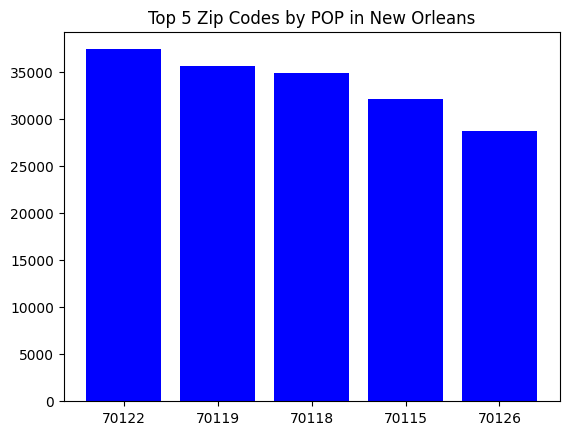

In [ ]:
#see document for instructions
import pandas as pd
import matplotlib.pyplot as plt


pdt = pd.read_csv("https://data.nola.gov/resource/bpzh-bryg.csv")
print(pdt.columns)
sp = pdt[["zcta5ce10", "sum_totpop"]]
sd = sp.sort_values(by = "sum_totpop", ascending = False)
print(sd)

t5 = sd.head()
plt.bar(t5['zcta5ce10'].astype(str), t5["sum_totpop"], color = "blue")
plt.title("Top 5 Zip Codes by POP in New Orleans")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from google.colab import files


pdt = pd.read_csv("https://data.nola.gov/resource/bpzh-bryg.csv")
bd = pd.read_csv("https://data.nola.gov/resource/hjcd-grvu.csv")

print(pdt.columns)
print(bd.columns)

spd = pdt[["zcta5ce10", "sum_totpop"]]
spd.rename(columns = {'zcta5ce10':'zip'}, inplace = True)
spd['zip'] = spd['zip'].astype(str)
sf['zip'] = sf['zip'].astype(str)
freqs = bd.groupby('zip').count().reset_index()
print(freqs.head())
sf = freqs[['zip', 'businessname']]

merged = pd.merge(spd, sf, on = 'zip', how = 'inner')
merged = merged[merged['sum_totpop'] > 0]
fig = px.treemap(
    merged,
    path = ['zip'],
    values = 'sum_totpop',
    color = 'businessname',
    color_continuous_scale = 'blues',
    title = 'Businesses by Zipcode In New Orleans'
)

fig.show()

Index(['the_geom', 'objectid', 'zcta5ce10', 'sum_pop100', 'sum_hu100',
       'sum_totpop', 'sum_white', 'sum_black', 'sum_amer_ind', 'sum_asian',
       'sum_pac_isldnr', 'sum_other_race', 'sum_multi_race', 'sum_totpop1',
       'sum_hisp_lat', 'sum_non_hislat', 'sum_totpop18up', 'sum_white_18up',
       'sum_black_18up', 'sum_amerind_18', 'sum_asian_18', 'sum_pacisl_18',
       'sum_other_ra18', 'sum_multi_ra18', 'sum_totpop18_1', 'sum_hisp_lat18',
       'sum_non_hila18', 'sum_total_hu', 'sum_occ_hu', 'sum_vacant_hu',
       'sum_totpop_gq', 'sum_instgq', 'sum_adulcorfac', 'sum_juvcorfac',
       'sum_nurshome', 'sum_othinstgq', 'sum_noninstgq', 'sum_col_dorm',
       'sum_military', 'sum_othnoninst', 'shape_starea', 'shape_stlength'],
      dtype='object')
Index(['businessname', 'ownername', 'businesstype', 'businesslicensenumber',
       'businessstartdate', 'address', 'streetnumber', 'streetdirection',
       'streetname', 'streetsuffix', 'suite', 'city', 'state', 'zip',
       '

/tmp/ipython-input-1266087431.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1266087431.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1266087431.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

bd = pd.read_csv('https://data.nola.gov/resource/hjcd-grvu.csv')
print(bd.columns)
freqs = bd.groupby('zip').count().reset_index()
print(freqs.head())
sf = freqs[['zip','businessname']]

sbd = bd.drop_duplicates(subset = 'zip')
sl = sbd[['zip', 'longitude', 'latitude']]

merged = pd.merge(sf, sl, on = "zip", how = 'inner')

fig = px.scatter_geo(
    merged,
    lon = 'longitude',
    lat = 'latitude',
    title = 'Businesses in the New Orleans',
    size = 'businessname',
    color = 'businessname',
)

fig.update_geos(
    lonaxis_range = [-90.5, -89.5],
    lataxis_range = [29.5, 30.5]
)
fig.show()

Index(['businessname', 'ownername', 'businesstype', 'businesslicensenumber',
       'businessstartdate', 'address', 'streetnumber', 'streetdirection',
       'streetname', 'streetsuffix', 'suite', 'city', 'state', 'zip',
       'phonenumber', 'mailaddress', 'mailsuite', 'mailcity', 'mailstate',
       'mailzip', 'latitude', 'longitude', 'location'],
      dtype='object')
          zip  businessname  ownername  businesstype  businesslicensenumber  \
0  02903-2951             1          1             1                      1   
1  02909-7411             1          1             1                      1   
2  06515-2316             1          1             1                      1   
3  06518-3220             1          1             1                      1   
4       07018             1          1             1                      1   

   businessstartdate  address  streetnumber  streetdirection  streetname  ...  \
0                  1        1             1                1          

Index(['department', 'dataset', 'description', 'data_steward', 'data_source',
       'start_date', 'end_date', 'geographic_granularity',
       'frequency_of_data_change', 'data_source_format', 'is_published',
       'open_data_link', 'completeness', 'accuracy', 'real_time_data_updates',
       'data_quality_score', 'data_quality_grade', 'data_classification',
       'interest_perceived_value_level',
       'supports_city_program_or_project_e_g_workforce_development_equity',
       'increases_gov_t_transparency_accountability', 'open_data_score',
       'open_data_grade', 'automated', 'delivery_cost', 'maintenance_cost',
       'cost_score', 'cost_grade'],
      dtype='object')


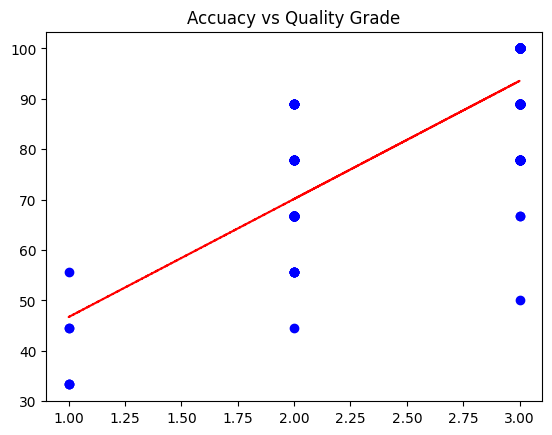

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

cd = pd.read_csv("https://data.nola.gov/resource/dhg4-3vbu.csv")
cd = cd[cd["data_quality_grade"] > 0]
cd = cd[cd["accuracy"] > 0]
print(cd.columns)

#data_quality_grade accuracy

slope, intercept = np.polyfit(cd["accuracy"], cd["data_quality_grade"], 1)
line = slope*np.array(cd["accuracy"]) + intercept

plt.scatter(cd["accuracy"], cd["data_quality_grade"] , color = 'blue')
plt.plot(cd["accuracy"], line, color='red', linestyle='dashed')
plt.title('Accuacy vs Quality Grade')
plt.show()